In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# to get current directory
os.getcwd()

'C:\\Users\\Dell\\Intellippat\\DL'

`os`: to use operating system related functions

- To know the `current working directory`: `os.getcwd()`

- To change the `change directory`: `os.chdir(path)`

## **Data Generation and Setup**

In [3]:
def generate_data(n_samples = 100, noise = 0.1, seed = 42):
    """
    Generate dummy linear data: y = 4 + 3*X + noise.
    
    Parameters:
    - n_samples: Number of data points to generate.
    - noise: Amount of random noise added to y.
    - seed: Random seed for reproducibility.

    Returns:
    - X: Feature matrix (independent variable).
    - y: Target variable (dependent variable).
    """
    np.random.seed(seed) # to reproduce the same random number
    x = 2 * np.random.rand(n_samples,1) # Generates random numbers from a uniform distribution in the range [0, 1].
    y = 4 + 3*x + noise * np.random.randn(n_samples,1) # Generates random numbers from a normal distribution with: Mean 0 and Standard deviation 1
    return x,y    

In [4]:
# Generate Data
x,y = generate_data(n_samples = 100, noise = 0.7)

In [5]:
print("Dimensions of x : ",x.ndim)
print("Dimensions of y : ",y.ndim)

Dimensions of x :  2
Dimensions of y :  2


In [6]:
print("Shape of x : ",x.shape)
print("Shape of y : ",y.shape)

Shape of x :  (100, 1)
Shape of y :  (100, 1)


In [7]:
df = pd.DataFrame()
df['x'] = x.flatten()  # Alternative way to convert (100,1) to (100,)
df['y'] = y.flatten()
df

,x,y
0,0.749080,6.308174
1,1.901429,9.494981
2,1.463988,8.456196
3,1.197317,6.200653
4,0.312037,4.782342
...,...,...
95,0.987591,6.391706
96,1.045466,7.082426
97,0.855082,6.804052
98,0.050838,4.346198


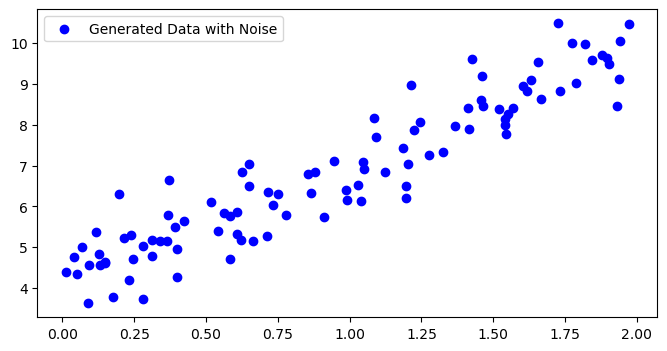

In [8]:
# Let us plot the data distribution - With Noise
plt.figure(figsize =(8,4))
plt.scatter(x,y,color = 'blue', label = 'Generated Data with Noise')
plt.legend()
plt.show()

In [9]:
# Generate data without noise
def generate_data_test(n_samples = 100, seed = 42):
    np.random.seed(seed)
    x = 2*np.random.rand(n_samples,1)
    y = 4 + 3*x
    return x,y

In [10]:
# Generate Data
x_test,y_test = generate_data_test(n_samples = 100)

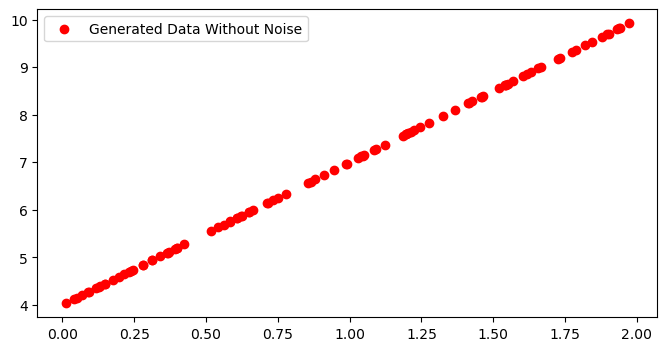

In [11]:
# plotting the data without noise
plt.figure(figsize = (8,4))
plt.scatter(x_test,y_test,color = 'red', label = 'Generated Data Without Noise')
plt.legend()
plt.show()

### **Adding Bias**

In [12]:
# number of rows in the data
m = len(y)

In [13]:
m

100

In [14]:
"""
Adding the bias term
Adding a bias term which is fixed value 1 to the existing X
np.c is for concatenating
"""
x_bias = np.c_[np.ones((m,1)),x]

In [15]:
x_bias

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

### **Defining Cost Function**

In [16]:
"""
Calculate the Mean Squared Cost Function
"""
def compute_cost(x,y,theta):
    m = len(y)
    return np.sum((x.dot(theta) - y) **2)/(2*m) # read below for extra 2

in denominator there is an extra 2 for differentiation convenience

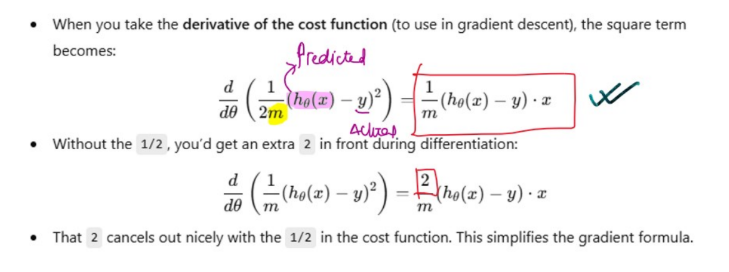

# **BATCH GRADIENT DESCENT Function**

In [17]:
def bgd( x, y, theta, learning_rate = 0.1, epochs = 1000):
    """
    Vanilla Gradient Descent using entire dataset.
    Returns the final theta and a history of the cost function.
    x = array of x with added bias
    y = vector of y
    theta = vector of weight and bias parameter
    learning_rate = 0.1 default
    epoch : no.of time model will run through the entire dataset
    """
    m = len(y)  # Number of training samples
    cost_history = np.zeros(epochs) # Stores cost values
    theta_history = np.zeros((epochs, theta.shape[0])) # Stores theta values

    for epoch in range(epochs):

        gradients = (x.T.dot(x.dot(theta) - y))/m # to calculate gradient of error function
        theta = theta - learning_rate * gradients
        cost = compute_cost(x,y,theta)

        # update the empty arrays for the theta and cost_history
        cost_history[epoch] = cost # uni-dimension
        theta_history[epoch,:] = theta.T # 2 dimensions

    return theta, cost_history, theta_history
    

## **Running the algorithm**

In [18]:
# initialising the parameters
np.random.seed(0)
# initialising the theta
theta = np.random.randn(2,1)
print(theta)

[[1.76405235]
 [0.40015721]]


In [19]:
theta.shape

(2, 1)

In [20]:
theta_bgd, cost_history_bgd, theta_history_bgd = bgd(x_bias, y, theta, learning_rate = 0.1, epochs = 30)

In [21]:
theta_bgd

array([[4.0700078 ],
       [2.90580348]])

In [22]:
cost_history_bgd

array([7.75001556, 4.95373459, 3.19306184, 2.08444818, 1.38639656,
       0.94685122, 0.6700721 , 0.49577758, 0.38601205, 0.31687719,
       0.2733257 , 0.24588318, 0.22858419, 0.21767263, 0.21078349,
       0.20642765, 0.20366748, 0.2019126 , 0.20079125, 0.20006936,
       0.19959952, 0.19928888, 0.19907899, 0.19893301, 0.19882774,
       0.19874855, 0.19868622, 0.19863492, 0.19859097, 0.19855204])

In [23]:
theta_history_bgd

array([[2.23205069, 0.92571924],
       [2.60382737, 1.3423793 ],
       [2.89924527, 1.67263224],
       [3.13406567, 1.93432758],
       [3.32079521, 2.14162876],
       [3.46935799, 2.30577432],
       [3.58762888, 2.4356819 ],
       [3.68185666, 2.53842754],
       [3.75699987, 2.61962596],
       [3.81699317, 2.6837323 ],
       [3.86495882, 2.73428165],
       [3.90337444, 2.77407896],
       [3.93420612, 2.80534988],
       [3.95901403, 2.82986037],
       [3.97903628, 2.84901161],
       [3.99525539, 2.86391535],
       [4.0084511 , 2.87545369],
       [4.01924222, 2.88432647],
       [4.02811987, 2.89108894],
       [4.03547383, 2.8961816 ],
       [4.04161351, 2.89995391],
       [4.04678448, 2.90268308],
       [4.05118172, 2.90458902],
       [4.05496   , 2.90584612],
       [4.05824224, 2.90659271],
       [4.06112606, 2.90693847],
       [4.06368897, 2.90697035],
       [4.0659926 , 2.90675728],
       [4.0680859 , 2.9063539 ],
       [4.0700078 , 2.90580348]])

In [24]:
print('BGD theta 0 : {:0.3f},\nBGS theta 1 : {:0.3f}'.format(theta_bgd[0][0],theta_bgd[1][0]))
print("Bgd Final cost value : {:0.3f}".format(cost_history_bgd[-1]))

BGD theta 0 : 4.070,
BGS theta 1 : 2.906
Bgd Final cost value : 0.199


---
1. **`theta_bgd[0][0]` and `theta_bgd[1][0]`**  
   - `theta_bgd` contains the optimized parameter values after running Batch Gradient Descent.  
   - `theta_bgd[0][0]` represents the **intercept term** \( \theta_0 \) (bias).  
   - `theta_bgd[1][0]` represents the **slope** \( \theta_1 \) (weight).

2. **Final Cost Value (`cost_history_bgd[-1]`)**  
   - `cost_history_bgd` stores the cost function values across iterations.  
   - `cost_history_bgd[-1]` retrieves the final cost value after training, indicating how well the model has minimized the loss.

---
- **\( \theta_0 = 4.070 \)** → The model’s intercept (bias).
- **\( \theta_1 = 2.906 \)** → The weight for the input feature.
- **Final Cost Value = 0.199** → The minimized cost function value after training.

This means the model's final learned function is approximately:  
\[
y = 4.070 + 2.906 . X
\]

## **Cost vs No. of epochs plot**

Text(0.5, 0.5, 'Final Cost: 0.199\nTheta0: 4.070\nTheta1: 2.906')

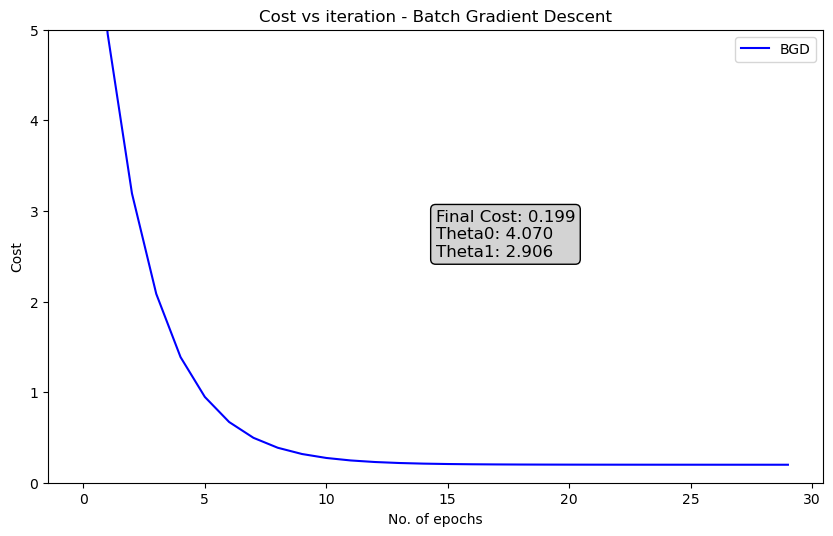

In [25]:
plt.figure(figsize=(10,20)) #canvas ready

# Plot for BGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_bgd)), cost_history_bgd, label='BGD', color='blue')
plt.title('Cost vs iteration - Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_bgd[-1]:.3f}\nTheta0: {theta_bgd[0][0]:.3f}\nTheta1: {theta_bgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

## **Plotting Best Fit Line**

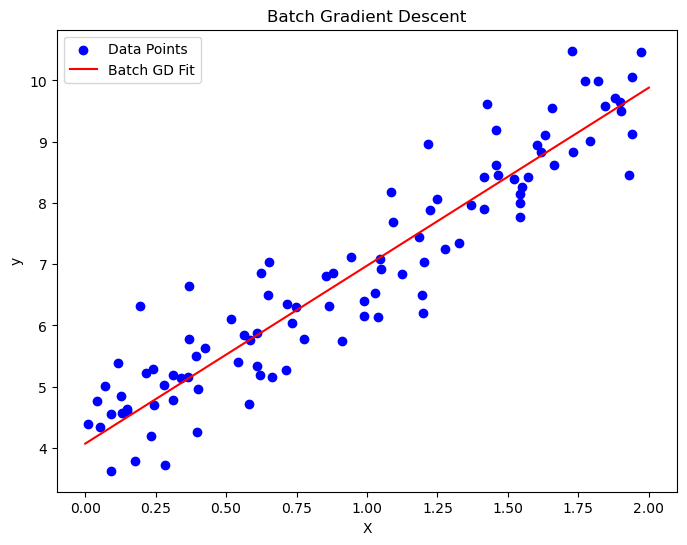

In [26]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(8,6))

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='red', label='Batch GD Fit')
plt.title("Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

---
# **MINI BATCH GRADIENT DESCENT FUNCTION**

In [27]:
indices = np.random.permutation(m)
"""
It advances the internal random state of NumPy. So when you later call np.random.permutation(m) inside the function, it uses a different seed.
In other words, just calling the random function once before the function call shifts the entire sequence of randomness used inside the function.
That leads to:
Different shuffles each epoch
Different mini-batches
Different gradient updates
And finally... a different final theta and final cost
"""
indices

array([26, 60,  2, 51, 71, 76, 16, 66, 56, 48, 54, 95, 98, 13,  7, 30, 22,
       24, 33,  8, 43, 75,  3, 73, 85, 74,  6, 45, 96, 78, 62, 82, 89, 92,
       61, 27, 18, 90, 59, 84, 44,  1, 63, 42, 41,  4, 15, 17, 40, 38,  5,
       94, 53,  0, 34, 28, 55, 50, 11, 35, 23, 52, 10, 31, 68, 57, 79, 93,
       32, 86, 14, 80, 19, 29, 49, 64, 47, 69, 20, 97, 72, 77, 25, 37, 81,
       46, 39, 65, 58, 12, 91, 88, 70, 87, 36, 21, 83,  9, 99, 67])

In [28]:
# Mini Batch Gradient Function

def mbgd(x,y, theta, learning_rate = 0.1, epochs = 100, batch_size = 32):
    """
    Mini Batch Gradient Descent using the entire dataset creates small
    batches usually of size 32(default) to 512.
    Suffles the data at the beginning of each epoch.
    The logic ensures that one sample/row/data point is only in one batch
    
    X: Input feature matrix (including bias term).
    y: Output target vector.
    theta: Parameter vector (weights and biases).
    learning_rate: Controls the step size during updates (default 0.1).
    epochs: Number of complete passes over the dataset (default 100).
    batch_size: Number of samples per mini-batch (default 32).
    """
    
    m = len(y)
    n_batches = int(np.ceil(m/batch_size))
    total_updates = epochs * n_batches
    
    """
    m: Stores the number of training examples.
    n_batches: Calculates the number of mini-batches required per epoch.
    total_updates: Total updates performed throughout all epochs.
    """

    cost_history = np.zeros(total_updates)
    theta_history = np.zeros((total_updates, theta.shape[0]))
    iter_num = 0 # to index cost_history and theta_history

    """
    cost_history: Stores cost after each mini-batch update.
    theta_history: Stores theta values after each update.
    iter_num: Keeps track of the number of updates.
    """

    for epoch in range(epochs): # Outer For loop to track no. of epochs
        indices = np.random.permutation(m) 
        """ 
        Shuffles dataset indices. 
        This shuffle is important because it ensures that every epoch starts with a different order of data.
        Why?
        If we don’t shuffle, the model will see mini-batches in the same order in every epoch.
        This might lead to learning patterns specific to batch ordering rather than true generalization.
        """
        x_shuffled = x[indices] #Rearranges X and y based on shuffled indices.
        y_shuffled = y[indices]

        for i in range(0,m,batch_size):
            x_batch = x_shuffled[i : i + batch_size]
            y_batch = y_shuffled[i : i + batch_size]

            # Calulate the Gradients
            gradients = (x_batch.T.dot(x_batch.dot(theta) - y_batch))/len(y_batch)
            theta = theta - learning_rate * gradients

            # optional -> record cost and theta after each mini_batch update
            cost = compute_cost(x,y,theta)

            # Update the empty arrays for theta and cost_history
            cost_history[iter_num] = cost
            theta_history[iter_num,:] = theta.T
            iter_num += 1
        
    return theta, cost_history, theta_history    

## **Running the MBGD Algorithm**

In [29]:
theta_mbgd, cost_history_mbgd, theta_history_mbgd = mbgd(x_bias, y, theta,  learning_rate = 0.1, epochs=100, batch_size=32)

In [30]:
print('MBGD Theta 0: {:0.3f}, \nMGD Theta 1: {:0.3f}'.format(theta_mbgd[0][0], theta_mbgd[1][0]))
print('MBGD Final Cost Value: {:0.3f}'.format(cost_history_mbgd[-1]))

MBGD Theta 0: 4.213, 
MGD Theta 1: 2.877
MBGD Final Cost Value: 0.203


In [31]:
len(cost_history_mbgd)

400

In [32]:
cost_history_mbgd

array([7.41316215, 5.25254491, 3.19358904, 2.06106149, 1.42686226,
       0.98539999, 0.67539417, 0.46978626, 0.37492343, 0.30089037,
       0.2677657 , 0.23363832, 0.22348857, 0.21101856, 0.20853393,
       0.20692666, 0.20861965, 0.2024991 , 0.20076395, 0.20187005,
       0.20008109, 0.20014993, 0.19996126, 0.20217271, 0.20434716,
       0.19972654, 0.19986102, 0.19872849, 0.19944789, 0.19847103,
       0.19853504, 0.19863118, 0.19909663, 0.19879582, 0.19844734,
       0.19952157, 0.20161798, 0.19877011, 0.19840312, 0.19837259,
       0.19827803, 0.19824024, 0.19825715, 0.19801751, 0.19806798,
       0.19870285, 0.19799729, 0.19791444, 0.19790125, 0.19822004,
       0.19785389, 0.19977569, 0.19975699, 0.19884226, 0.19821462,
       0.1983933 , 0.1980393 , 0.19791662, 0.19827252, 0.19808477,
       0.19959724, 0.19919583, 0.1977308 , 0.20151283, 0.19886164,
       0.19867813, 0.19854145, 0.20231294, 0.20213922, 0.20082245,
       0.19888291, 0.19796714, 0.19817785, 0.19773895, 0.19775

In [33]:
len(theta_history_mbgd)

400

In [34]:
theta_history_mbgd

array([[2.25689996, 0.98532776],
       [2.5708446 , 1.28279189],
       [2.90213247, 1.66984062],
       [3.11836567, 1.95982255],
       [3.29810504, 2.13772584],
       [3.44606536, 2.29768284],
       [3.57238556, 2.44451837],
       [3.6583995 , 2.59328153],
       [3.72651054, 2.66618676],
       [3.79466786, 2.7384168 ],
       [3.83317323, 2.78001347],
       [3.89108628, 2.82963362],
       [3.91419475, 2.84860191],
       [3.94613688, 2.8847398 ],
       [3.95648847, 2.89185798],
       [3.97274418, 2.88609413],
       [3.96893757, 2.8761907 ],
       [3.99786292, 2.90484281],
       [4.0116545 , 2.91903422],
       [4.00603285, 2.90340538],
       [4.02096639, 2.9261041 ],
       [4.02134052, 2.92106123],
       [4.02686373, 2.91638935],
       [4.01283389, 2.88897944],
       [4.00137996, 2.87659845],
       [4.03113614, 2.91802653],
       [4.0334817 , 2.90612321],
       [4.07553514, 2.9188578 ],
       [4.09365161, 2.92961778],
       [4.07768358, 2.90756242],
       [4.

In [35]:
len(theta_history_mbgd)

400

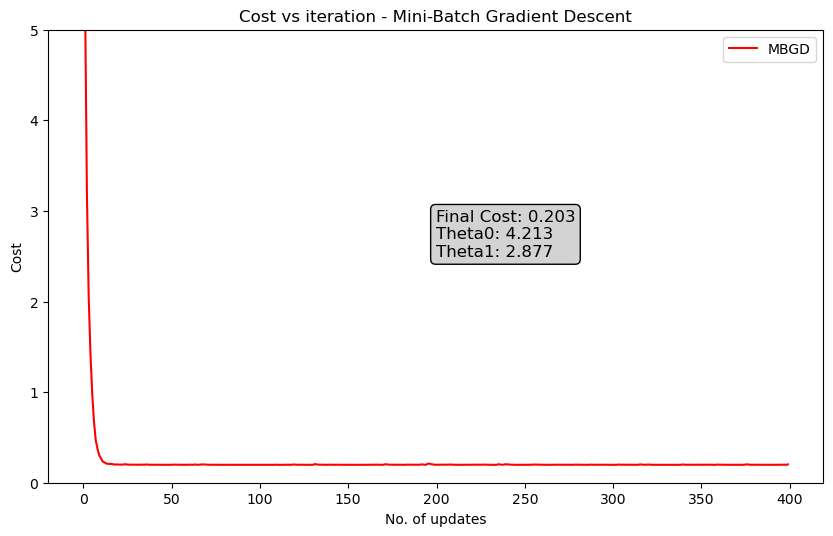

In [36]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(10,20)) #canvas ready

# Plot for MBGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_mbgd)), cost_history_mbgd, label='MBGD', color='red')
plt.title('Cost vs iteration - Mini-Batch Gradient Descent')
plt.xlabel('No. of updates')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_mbgd[-1]:.3f}\nTheta0: {theta_mbgd[0][0]:.3f}\nTheta1: {theta_mbgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.show()


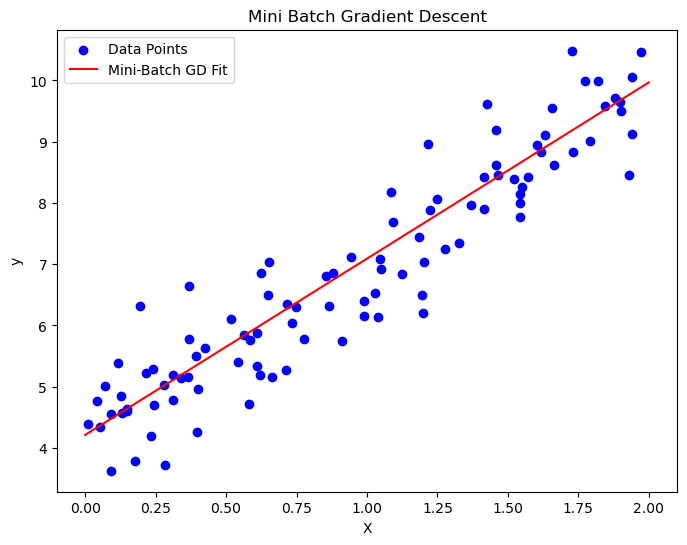

In [37]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_mbgd), color='red', label='Mini-Batch GD Fit')
plt.title("Mini Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# **Summary**
1. **Shuffle Data:** Shuffle dataset at the beginning of each epoch.
2. **Mini-Batch Loop:** Select a mini-batch of `batch_size` samples.
3. **Compute Gradients:** Use the gradient formula to update `theta`.
4. **Store Cost & Weights:** Record cost and weight values.
5. **Repeat for Multiple Epochs:** Improve `theta` over multiple iterations.
6. **Plot Results:** Visualize cost function and best-fit line.

---
This code efficiently optimizes `theta` using **Mini-Batch Gradient Descent**, a balance between **Batch GD (slow but stable)** and **Stochastic GD (fast but noisy)**. 🚀

---
# **STOCHASTIC GRADIENT DESCENT**

In [38]:
def sgd (x, y, theta, learning_rate = 0.1, epochs = 100):
    """
    It is an optimization algorithms that minimizes the loss(cost) function
    by computing gradient for one orw/sample randomly chosen from training data
    and updates parameters (bias and weights) for each sample.
    X = Array of X with added bias
    y = Vector of y
    theta: vector of weight parameter randomly assigned
    learning_rate: default to 0.1
    epochs: number of times model will run through the entire training dataset
    """
    m = len(y) # no. of rows/records/sample
    cost_history = np.zeros(epochs*m) # zero array to store the cost after each update
    theta_history = np.zeros((epochs*m,theta.shape[0])) #zero-array to store the parameter (weights & biases) values
    """
    So, epochs * m gives the total number of training steps (if you're updating theta for every data point — i.e., stochastic gradient descent).
    theta.shape[0]: This gives the number of parameters in the model. For example, if your model has 3 features + 1 bias → theta.shape[0] = 4.
    """

    for epoch in range(epochs): # loop over number of epochs
        
        for i in range(m): #loop over each training row per epoch

            # Randomly select a training row/training example
            rand_index = np.random.randint(0,m) #generates a random integer between 0 and m - 1 (inclusive)
            x_i  = x[rand_index,:].reshape(1,x.shape[1])
            y_i = y[rand_index, :].reshape(1,1)
            """
            x[rand_index, :]: Selects the row at index rand_index (i.e., one sample).
            reshape(1, x.shape[1]): Reshapes the selected row into a 2D array with shape (1, number of features)
            """

            # Compute the gradient for each row and update the theta
            gradients = x_i.T.dot(x_i.dot(theta) - y_i)
            theta = theta - learning_rate*gradients
            cost = compute_cost(x, y, theta)

            # Update the empty arrays for theta and cost_history
            cost_history[epoch*m +i] = cost
            theta_history[epoch*m +i, :] = theta.T

    return theta, cost_history, theta_history            

## **Running the SGD Algorithm**

In [39]:
theta_sgd, cost_history_sgd, theta_history_sgd = sgd(x_bias, y, theta,  learning_rate = 0.1, epochs=100)

In [40]:
print('SGD Theta 0: {:0.3f}, \nSGD Theta 1: {:0.3f}'.format(theta_sgd[0][0], theta_sgd[1][0]))
print('SGD Final Cost Value: {:0.3f}'.format(cost_history_sgd[-1]))

SGD Theta 0: 3.959, 
SGD Theta 1: 2.707
SGD Final Cost Value: 0.251


In [41]:
print('Total number of total updates for the cost is:', len(cost_history_sgd))

Total number of total updates for the cost is: 10000


In [42]:
cost_history_sgd

array([4.15971404, 3.28382648, 2.39172866, ..., 0.2634172 , 0.32705478,
       0.2506061 ])

### Let us plot the cost function vs updates - `SGD`

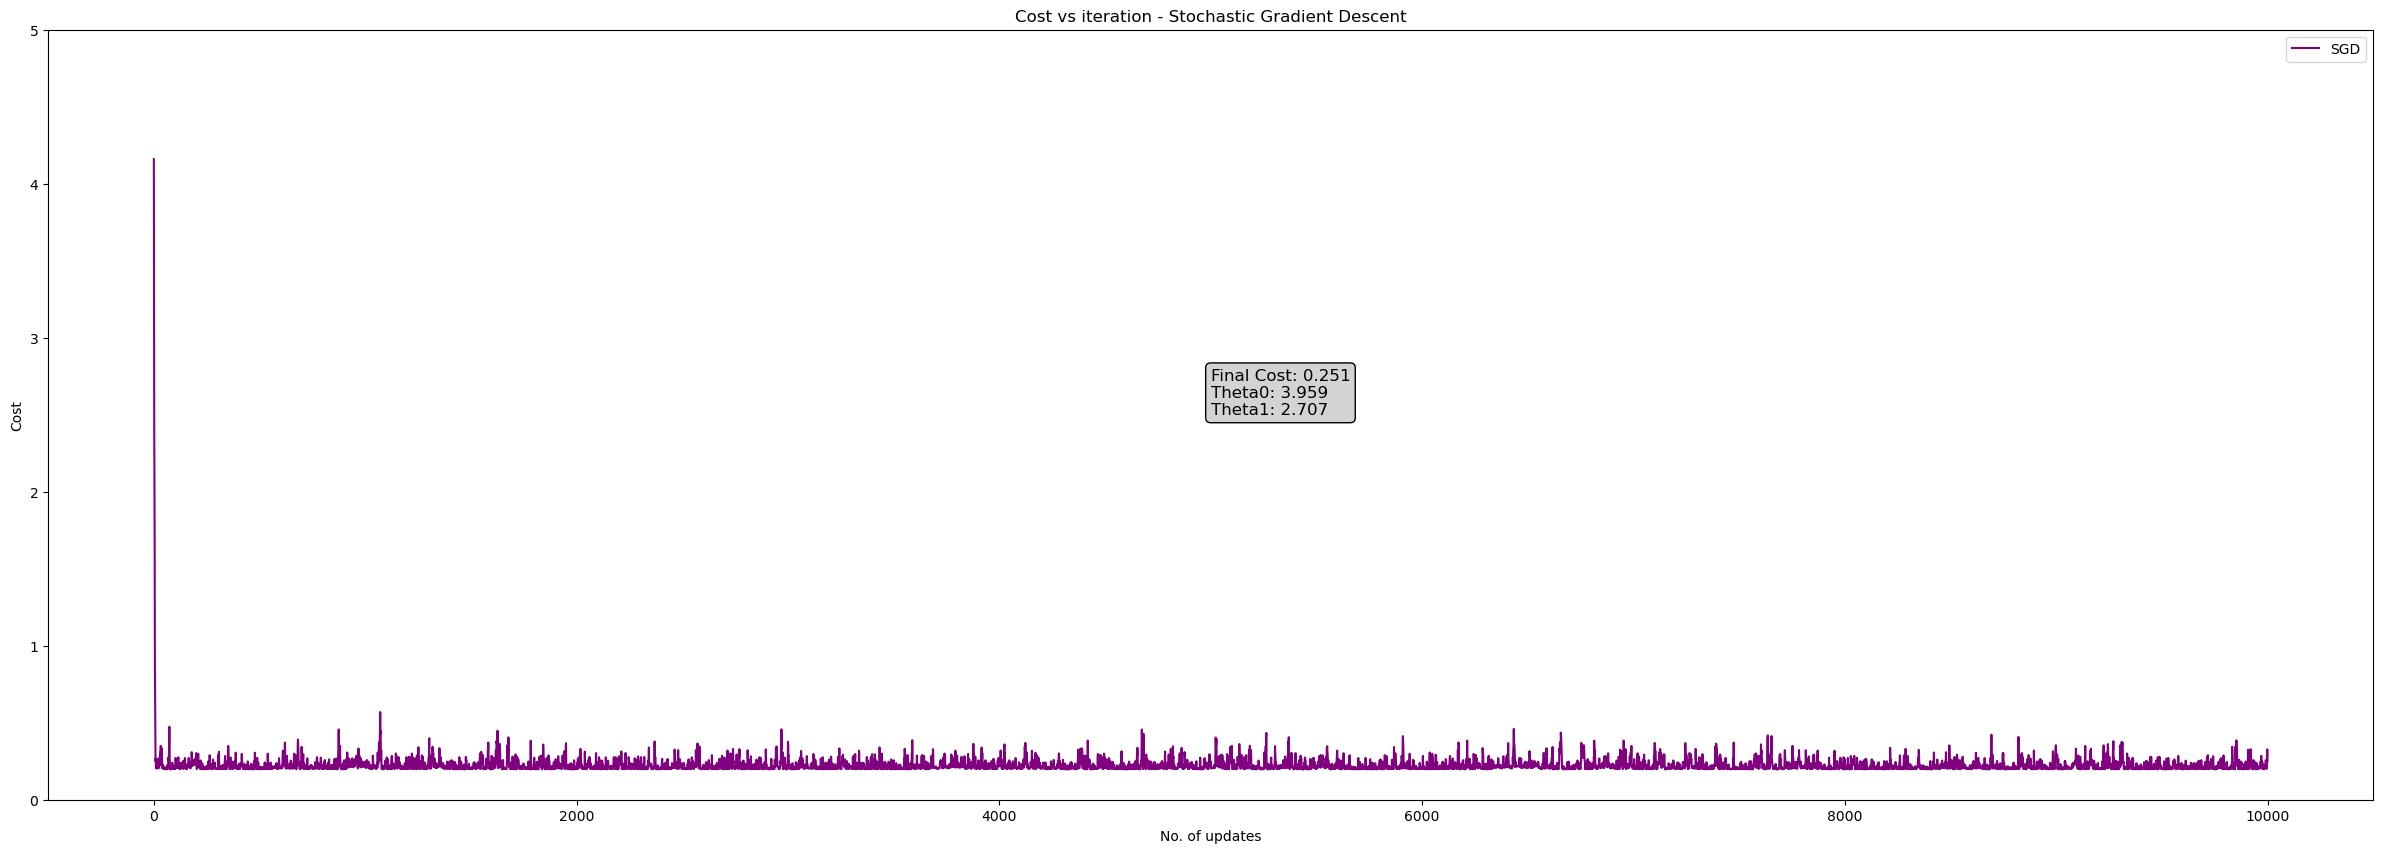

In [43]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(30,10)) #canvas ready
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD', color='purple')
plt.title('Cost vs iteration - Stochastic Gradient Descent')
plt.xlabel('No. of updates')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_sgd[-1]:.3f}\nTheta0: {theta_sgd[0][0]:.3f}\nTheta1: {theta_sgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.show()


## **plotting the BEST FIT LINE**

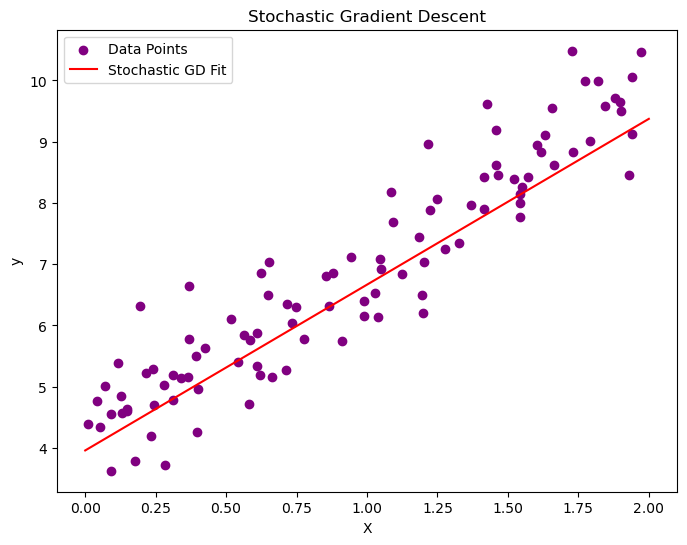

In [44]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='purple', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_sgd), color='red', label='Stochastic GD Fit')
plt.title("Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

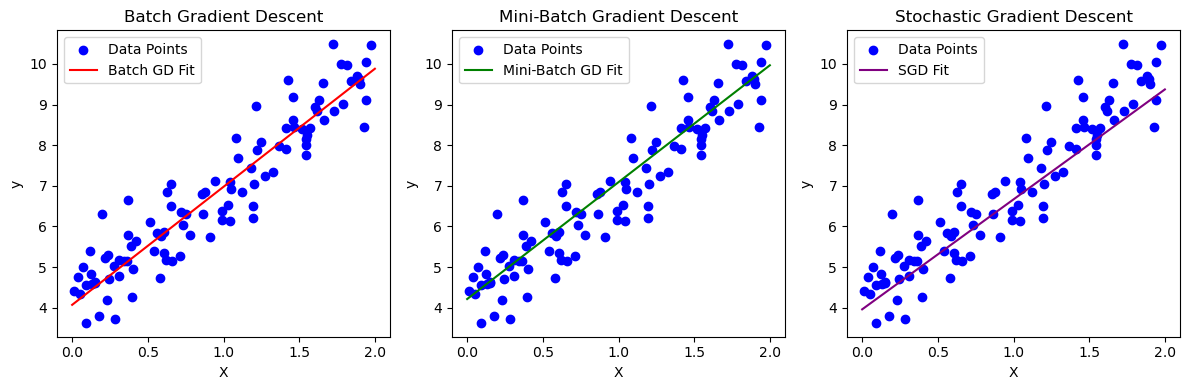

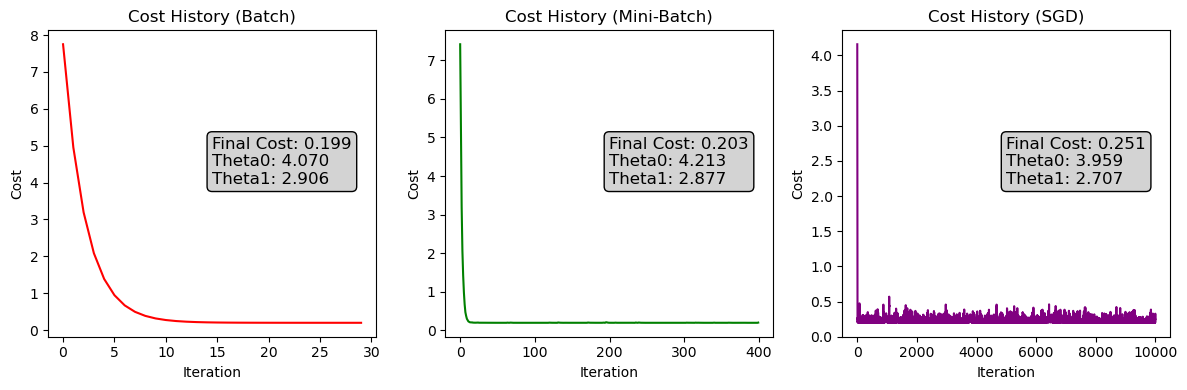

In [45]:
# -------------------------------
# 4. Visualization
# -------------------------------

# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='red', label='Batch GD Fit')
plt.title("Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_mbgd), color='green', label='Mini-Batch GD Fit')
plt.title("Mini-Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_sgd), color='purple', label='SGD Fit')
plt.title("Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

# Plot cost history curves for each algorithm to compare convergence
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(cost_history_bgd, color='red')
plt.title("Cost History (Batch)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.annotate(f'Final Cost: {cost_history_bgd[-1]:.3f}\nTheta0: {theta_bgd[0][0]:.3f}\nTheta1: {theta_bgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.subplot(1, 3, 2)
plt.plot(cost_history_mbgd, color='green')
plt.title("Cost History (Mini-Batch)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.annotate(f'Final Cost: {cost_history_mbgd[-1]:.3f}\nTheta0: {theta_mbgd[0][0]:.3f}\nTheta1: {theta_mbgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.subplot(1, 3, 3)
plt.plot(cost_history_sgd, color='purple')
plt.title("Cost History (SGD)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.annotate(f'Final Cost: {cost_history_sgd[-1]:.3f}\nTheta0: {theta_sgd[0][0]:.3f}\nTheta1: {theta_sgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.tight_layout()
plt.show()

---

### ✅ **Comparison of Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent (MBGD)**

| **Aspect**                     | **Batch Gradient Descent (BGD)**            | **Stochastic Gradient Descent (SGD)**        | **Mini-batch Gradient Descent (MBGD)**        |
|-------------------------------|---------------------------------------------|----------------------------------------------|------------------------------------------------|
| **Update Frequency**          | After **entire dataset**                    | After **each training example**              | After each **mini-batch**                      |
| **Memory Requirement**        | 🔴 **High** (entire dataset)                | 🟢 **Low** (one example)                      | 🟡 **Medium** (mini-batch)                     |
| **Speed per Update**          | 🔴 **Slow**                                 | 🟢 **Fast**                                   | 🟡 **Medium**                                   |
| **Convergence Stability**     | 🟢 **Very stable**                          | 🔴 **Highly fluctuating**                     | 🟡 **Moderate stability**                      |
| **Total Convergence Speed**   | 🔴 **Slow overall**                         | 🟢 **Fast** (but noisy)                       | 🟢 **Fast and stable**                          |
| **Noise in Updates**          | 🟢 **Very low**                             | 🔴 **Very high**                              | 🟡 **Lower noise** than SGD                    |
| **Generalization Ability**    | 🟡 **Moderate**                             | 🟢 **Often better** (due to randomness)       | 🟢 **Good**                                     |
| **Escape Local Minima**       | 🔴 **Hard**                                 | 🟢 **Easier** (random noise helps)            | 🟢 **Easier** than BGD                         |
| **Efficiency on Large Datasets**| 🔴 **Low**                                 | 🟢 **High**                                   | 🟢 **Very high**                                |
| **Parallelization Friendly**  | 🔴 **Less feasible**                        | 🟢 **Easy**                                   | 🟢 **Highly parallelizable**                   |
| **Typical Use Cases**         | 📘 **Small datasets**, offline learning     | 🌐 **Streaming, online learning**            | 🤖 **Deep learning, large datasets**           |

---

### 🏁 **Summary**

- 🔹 **Use BGD** when data is small, and you need high precision and stable convergence.
- 🔹 **Use SGD** when working with **streaming or large datasets** and want fast, frequent updates.
- 🔹 **Use MBGD** for a **balanced trade-off**, especially in deep learning tasks. It combines the best of both worlds.
